# Tracking

Maps :

In [1]:
from module import toSunpyMap

map_old = toSunpyMap('data/L2/imoa_03933_l2_20240319_15102678_emi1.fts.bz2')
map_new = toSunpyMap('data/L2/imoa_03933_l2_20240323_13052647_emi1.fts.bz2')


Labels :

In [2]:
from module import groupSunspots

labels_old, centroids_old = groupSunspots(map_old)
labels_new, centroids_new = groupSunspots(map_new)

Predict :

In [45]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from sunpy.coordinates import RotatedSunFrame
import numpy as np

for idx_old, centroid_old in enumerate(centroids_old[1:]):
    point = map_old.pixel_to_world(centroid_old[0]*u.pixel, (centroid_old[1])*u.pixel)
    diffrot_point = SkyCoord(RotatedSunFrame(base=point, rotated_time=map_new.date))
    transformed_diffrot_point = diffrot_point.transform_to(map_new.coordinate_frame)

    min_dist = np.inf
    min_idx = 0
    
    for idx_new, centroid_new in enumerate(centroids_new[1:]):
        point_new = map_new.pixel_to_world(centroid_new[0]*u.pixel, (centroid_new[1])*u.pixel)
        dist = transformed_diffrot_point.separation(point_new).deg
        
        if min_dist > dist:
            min_dist=dist
            min_idx=idx_new+1
    
    if min_dist<0.05:
        print(idx_old+1, min_idx, min_dist)

1 2 0.03255598017991311
3 4 0.02499809658999849


In [43]:
centroid = centroids_old[3]
point = map_old.pixel_to_world(centroid[0]*u.pixel, (centroid[1])*u.pixel)

diffrot_point = SkyCoord(RotatedSunFrame(base=point, rotated_time=map_new.date))

transformed_diffrot_point = diffrot_point.transform_to(map_new.coordinate_frame)

centroid = centroids_new[4]
closest_point = map_new.pixel_to_world(centroid[0]*u.pixel, (centroid[1])*u.pixel)
transformed_diffrot_point.separation(closest_point).deg


0.02499809658999849

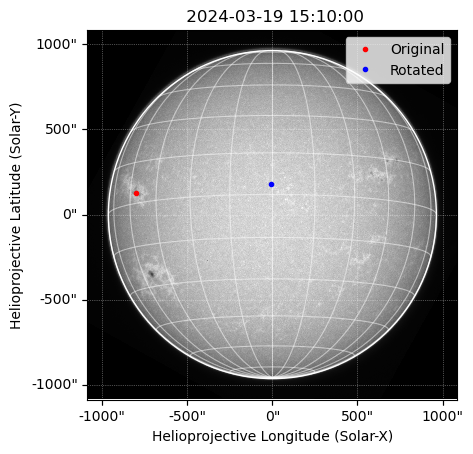

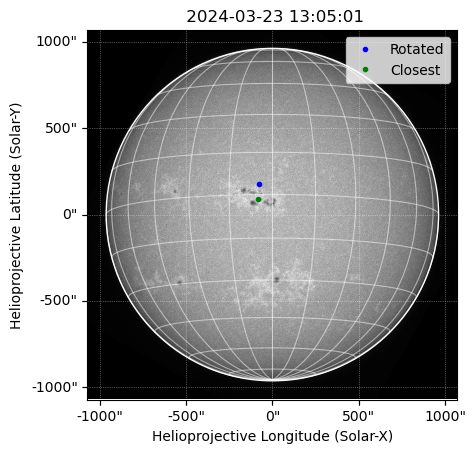

In [44]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection=map_old)
map_old.plot(axes=ax)
map_old.draw_limb(axes=ax)
map_old.draw_grid(axes=ax)
ax.plot_coord(point, 'r.', fillstyle='full', label='Original')
ax.plot_coord(transformed_diffrot_point, 'b.', fillstyle='full', label='Rotated')
ax.legend(loc='upper right')

plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection=map_new)
map_new.plot(axes=ax)
map_new.draw_limb(axes=ax)
map_new.draw_grid(axes=ax)
ax.plot_coord(transformed_diffrot_point, 'b.', fillstyle='full', label='Rotated')
ax.plot_coord(closest_point, 'g.', fillstyle='full', label='Closest')
ax.legend(loc='upper right')

plt.show()

## Identifiers

Sunspots:
- datetime
- umbra
- penumbra
- centroids (labeled 1:end)
- identifiers (NOAA if available)

NOAA data